Comcast is an American global telecommunication company. The firm has been providing terrible customer service.
Based on the dataset perform the tasks :
1.Provide the trend chart for the number of complaints at monthly and daily granularity levels.
2.Provide a table with the frequency of complaint types.
3.Create a new categorical variable with value as Open and Closed. 
4.Provide state wise status of complaints in a stacked bar chart
5.Provide insights on: Which state has the maximum complaints
6.Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#1 Import data into python environment
comcastDF = pd.read_csv('Comcast_telecom_complaints_data.csv')
comcastDF.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [30]:
#2 Provide the trend chart for the number of complaints at monthly and daily granularity levels

#split the month and date details from the Date_month_year column
comcastDF['month'] = pd.to_datetime(comcastDF['Date_month_year']).dt.month_name()
comcastDF['date'] = pd.to_datetime(comcastDF['Date_month_year']).dt.day
comcastDF.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26


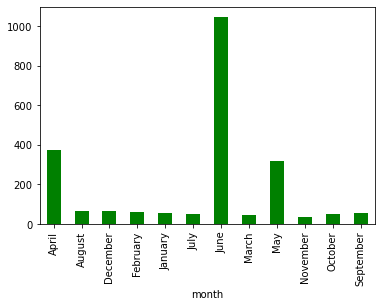

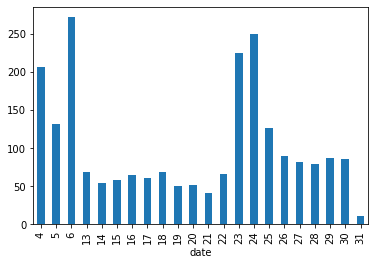

In [31]:
#group by month for monthly granularity level and group by date for daily granularity 
comcastDF.groupby(['month'])['Customer Complaint'].count().plot(kind='bar', color='green')
plt.show()

comcastDF.groupby(['date'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

In [32]:
#3 Provide a table with the frequency of complaint types.
comcastDF['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


In [33]:
#4 Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
comcastDF['Customer Complaint'].value_counts().head()

Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Comcast Billing     11
Name: Customer Complaint, dtype: int64

In [35]:
#5 Create a new categorical variable with value as Open and Closed. 
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
comcastDF['Status'] = comcastDF['Status'].apply(lambda x: 'Open' if ((x == 'Open') | (x == 'Pending')) else 'Closed')
comcastDF.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,May,26


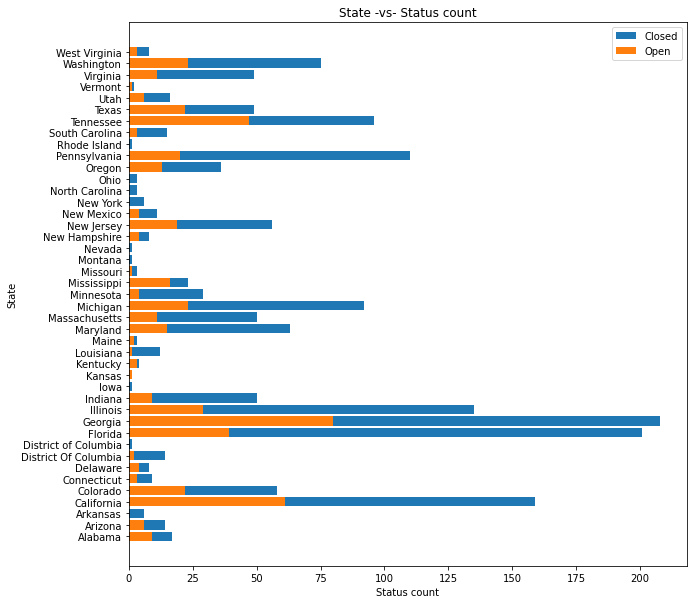

In [36]:
#6 Provide state wise status of complaints in a stacked bar chart
openComplaints = comcastDF[comcastDF['Status'] == 'Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
closedComplaints = comcastDF[comcastDF['Status'] == 'Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

figre = plt.figure(figsize=(10,10))
plt.barh(closedComplaints.State, closedComplaints.Status)
plt.barh(openComplaints.State, openComplaints.Status)

plt.xlabel("Status count")
plt.ylabel("State", size=10)
plt.legend(["Closed", "Open"])
plt.title("State -vs- Status count")
plt.show()

In [37]:
#7 Provide insights on: Which state has the maximum complaints
openComplaints.sort_values('Status', ascending=False).head(1)

,State,Status
8,Georgia,80


In [38]:
#7 Which state has the highest percentage of unresolved complaints
print("The state that has maximum complaints is " + "Georgia")
print("The state that has highest percentage of unresolved complaints is " + "Georgia")

The state that has maximum complaints is Georgia
The state that has highest percentage of unresolved complaints is Georgia


In [39]:
#8 Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
comcastDF[comcastDF['Status']=='Closed']['Received Via'].value_counts(normalize=True)*100

Customer Care Call    50.615114
Internet              49.384886
Name: Received Via, dtype: float64